# Experiments with Doc2Vec

Try to represent code in Doc2Vec. 

## Setup

In [94]:
import logging
import multiprocessing
from pathlib import Path

import gensim.models.doc2vec
import regex
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from javalang import tokenizer

from code_embeddings.utils import tokenize

assert gensim.models.doc2vec.FAST_VERSION > -1, "This will be painfully slow otherwise"

log = logging.getLogger()
logging.basicConfig(level=logging.WARNING)

## Build and Train the Model

In [95]:
test_code_dir = Path('test_data')
train_code_dir = Path('training_data')
models_dir = Path('models')

In [96]:
def split_methods(code):
    """Parse Java files into separate methods

        :param code: Java code to parse.
        :rtype: map
    """
    pattern = r'(?:(?:public|private|static|protected)\s+)*\s*[\w\<\>\[\]]+\s+\w+\s*\([^{]+({(?:[^{}]+\/\*.*?\*\/|[^{}]+\/\/.*?$|[^{}]+|(?1))*+})'
    scanner = regex.finditer(pattern, code, regex.MULTILINE)
    return map(lambda match: match.group(0), scanner)

In [97]:
def read_train_corpus():
    count = 0
    for i, file in enumerate(train_code_dir.glob('./java_projects/**/*.java')):
        if not file.is_file():  # oddly, some of these are not files
            continue
        with file.open() as f:
            try:
                code = f.read()
                methods = split_methods(code)
                for method in methods:
                    tokens = list(tokenizer.tokenize(method))
                    tokens = [token for t in tokens for token in t.value.split(" ")]
                    if tokens:
                        tag = "Method_%s" % count
                        count += 1
                        yield TaggedDocument(tokens, [tag])
            except Exception as e:
                log.debug("Warning: %s" % e)
                pass
        if i % 10000 == 0:
            log.info("Processed %s records" % i)
        if i > 100000:
            break


%time train_corpus = list(read_train_corpus())
print("Training corpus size: %s" % len(train_corpus))


INFO:root:Processed 10000 records


INFO:root:Processed 20000 records


INFO:root:Processed 30000 records


INFO:root:Processed 40000 records


INFO:root:Processed 50000 records


INFO:root:Processed 60000 records


INFO:root:Processed 70000 records


INFO:root:Processed 80000 records


INFO:root:Processed 90000 records


INFO:root:Processed 100000 records


CPU times: user 13min 39s, sys: 27.9 s, total: 14min 6s
Wall time: 14min 44s
Training corpus size: 606108


In [98]:
model = Doc2Vec(vector_size=100,
                epochs=15,
                window=8,
                min_count=2,  
                workers=multiprocessing.cpu_count())

In [99]:
model.build_vocab(train_corpus)

INFO:gensim.models.doc2vec:collecting all words and their counts


INFO:gensim.models.doc2vec:PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #10000, processed 1045855 words (3667112/s), 32703 word types, 10000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #20000, processed 2366726 words (4578265/s), 63225 word types, 20000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #30000, processed 2956006 words (3782803/s), 77615 word types, 30000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #40000, processed 3557689 words (3667686/s), 87141 word types, 40000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #50000, processed 4204694 words (3437794/s), 96948 word types, 50000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #60000, processed 4649897 words (3268945/s), 105099 word types, 60000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #70000, processed 5497657 words (4294364/s), 124958 word types, 70000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #80000, processed 6491892 words (4445656/s), 136477 word types, 80000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #90000, processed 7332362 words (3497372/s), 155459 word types, 90000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #100000, processed 8190307 words (3221131/s), 169796 word types, 100000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #110000, processed 9148209 words (3044362/s), 193277 word types, 110000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #120000, processed 11191794 words (3747474/s), 227092 word types, 120000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #130000, processed 11899329 words (3877239/s), 239700 word types, 130000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #140000, processed 12557170 words (3781250/s), 251019 word types, 140000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #150000, processed 13157547 words (3983779/s), 255617 word types, 150000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #160000, processed 15269002 words (4894396/s), 285717 word types, 160000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #170000, processed 18360044 words (5072580/s), 329368 word types, 170000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #180000, processed 19783020 words (4609067/s), 345561 word types, 180000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #190000, processed 21694563 words (4733814/s), 377302 word types, 190000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #200000, processed 22559766 words (230438/s), 391389 word types, 200000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #210000, processed 23491934 words (4377870/s), 398939 word types, 210000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #220000, processed 24777322 words (4830378/s), 402475 word types, 220000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #230000, processed 30617121 words (5486656/s), 413865 word types, 230000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #240000, processed 33447257 words (5356334/s), 424544 word types, 240000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #250000, processed 34371795 words (4405796/s), 435338 word types, 250000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #260000, processed 35466607 words (4425755/s), 461347 word types, 260000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #270000, processed 36884064 words (4701976/s), 486631 word types, 270000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #280000, processed 37108587 words (2590751/s), 490726 word types, 280000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #290000, processed 37352859 words (2889521/s), 494848 word types, 290000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #300000, processed 38208459 words (4578601/s), 509023 word types, 300000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #310000, processed 39095424 words (4692228/s), 528073 word types, 310000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #320000, processed 39862322 words (4321669/s), 540866 word types, 320000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #330000, processed 40701174 words (4215951/s), 556941 word types, 330000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #340000, processed 41547235 words (3908849/s), 571609 word types, 340000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #350000, processed 42597609 words (3939664/s), 590923 word types, 350000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #360000, processed 43959158 words (4796699/s), 614290 word types, 360000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #370000, processed 45367663 words (4669281/s), 635137 word types, 370000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #380000, processed 46220345 words (3912749/s), 649287 word types, 380000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #390000, processed 46817802 words (3707256/s), 662914 word types, 390000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #400000, processed 47573237 words (3972941/s), 675822 word types, 400000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #410000, processed 48546094 words (4251199/s), 696577 word types, 410000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #420000, processed 50290958 words (4477231/s), 717878 word types, 420000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #430000, processed 50579198 words (3139845/s), 722372 word types, 430000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #440000, processed 50866291 words (2999132/s), 727979 word types, 440000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #450000, processed 51527360 words (3877599/s), 738475 word types, 450000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #460000, processed 52859305 words (4673690/s), 751187 word types, 460000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #470000, processed 53819289 words (4364566/s), 764719 word types, 470000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #480000, processed 54544622 words (3925647/s), 777844 word types, 480000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #490000, processed 55308006 words (4015989/s), 788521 word types, 490000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #500000, processed 56111859 words (4109948/s), 798776 word types, 500000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #510000, processed 56730125 words (3948829/s), 810036 word types, 510000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #520000, processed 57370050 words (4212835/s), 813548 word types, 520000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #530000, processed 57949834 words (3687623/s), 824584 word types, 530000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #540000, processed 58706350 words (4345680/s), 837499 word types, 540000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #550000, processed 59302037 words (3789955/s), 846980 word types, 550000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #560000, processed 59942882 words (3724631/s), 860503 word types, 560000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #570000, processed 60914241 words (4427723/s), 874847 word types, 570000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #580000, processed 61753322 words (4126764/s), 889128 word types, 580000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #590000, processed 62596877 words (4182903/s), 902665 word types, 590000 tags


INFO:gensim.models.doc2vec:PROGRESS: at example #600000, processed 63197940 words (3821443/s), 910878 word types, 600000 tags


INFO:gensim.models.doc2vec:collected 918755 word types and 606108 unique tags from a corpus of 606108 examples and 63714000 words


INFO:gensim.models.word2vec:Loading a fresh vocabulary


INFO:gensim.models.word2vec:min_count=2 retains 626913 unique words (68% of original 918755, drops 291842)


INFO:gensim.models.word2vec:min_count=2 leaves 63422158 word corpus (99% of original 63714000, drops 291842)


INFO:gensim.models.word2vec:deleting the raw counts dictionary of 918755 items


INFO:gensim.models.word2vec:sample=0.001 downsamples 35 most-common words


INFO:gensim.models.word2vec:downsampling leaves estimated 33888736 word corpus (53.4% of prior 63422158)


INFO:gensim.models.base_any2vec:estimated required memory for 626913 words and 100 dimensions: 1178651700 bytes


INFO:gensim.models.word2vec:resetting layer weights


In [100]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

INFO:gensim.models.base_any2vec:training model with 8 workers on 626913 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=8


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 1.09% examples, 399329 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 2.07% examples, 493901 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 3.54% examples, 446738 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 5.19% examples, 407937 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 6.84% examples, 400897 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 8.36% examples, 376714 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 10.12% examples, 360032 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 11.23% examples, 367557 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 13.10% examples, 386674 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 14.50% examples, 389070 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 15.98% examples, 390048 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 17.44% examples, 394826 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 18.76% examples, 402660 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 19.45% examples, 428915 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 21.03% examples, 426976 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 22.54% examples, 419789 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 24.30% examples, 414419 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 25.81% examples, 412283 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 26.38% examples, 438150 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 27.09% examples, 449890 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 27.89% examples, 465759 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 28.53% examples, 486911 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 29.97% examples, 491418 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 31.12% examples, 496415 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 32.62% examples, 491938 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 33.97% examples, 491268 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 35.38% examples, 490141 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 36.78% examples, 489270 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 37.83% examples, 498475 words/s, in_qsize 11, out_qsize 4


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 37.96% examples, 523467 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 38.76% examples, 532886 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 39.86% examples, 536408 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 41.27% examples, 533214 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 42.62% examples, 532669 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 43.98% examples, 531529 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 45.25% examples, 527066 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 47.20% examples, 516392 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 48.88% examples, 513458 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 50.43% examples, 509980 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 51.80% examples, 507293 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 53.37% examples, 505970 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 54.92% examples, 502018 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 56.39% examples, 500893 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 57.72% examples, 500738 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 59.06% examples, 501259 words/s, in_qsize 16, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 60.14% examples, 504451 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 61.28% examples, 505610 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 62.71% examples, 501711 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 64.34% examples, 497849 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 65.76% examples, 494348 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 67.15% examples, 491295 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 68.12% examples, 495366 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 69.27% examples, 496206 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 71.19% examples, 489926 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 73.18% examples, 484482 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 74.60% examples, 483653 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 75.87% examples, 485431 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 77.23% examples, 485475 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 78.79% examples, 482920 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 80.44% examples, 481438 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 81.96% examples, 479681 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 83.67% examples, 477598 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 85.21% examples, 475660 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 86.94% examples, 473002 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 88.49% examples, 471063 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 90.06% examples, 468399 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 91.74% examples, 466686 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 93.33% examples, 464694 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 94.52% examples, 465749 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 96.03% examples, 464393 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 97.50% examples, 463138 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 99.10% examples, 461156 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 63714000 raw words (33843991 effective words) took 73.4s, 461198 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 1.15% examples, 435493 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 2.19% examples, 520766 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 3.84% examples, 479483 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 5.48% examples, 423219 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 6.95% examples, 412459 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 8.51% examples, 381330 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 10.26% examples, 365833 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 11.23% examples, 367099 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 13.01% examples, 382715 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 14.43% examples, 386396 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 15.89% examples, 387972 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 17.35% examples, 392692 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 18.72% examples, 401966 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 19.61% examples, 431428 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 21.06% examples, 427242 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 22.60% examples, 420636 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 24.46% examples, 415550 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 25.93% examples, 418876 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 26.48% examples, 449465 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 27.51% examples, 458294 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 28.06% examples, 484086 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 29.10% examples, 492036 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 30.14% examples, 501655 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 31.39% examples, 500809 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 32.95% examples, 497616 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 34.36% examples, 495265 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 35.69% examples, 494689 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 37.07% examples, 494592 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 37.84% examples, 508427 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 38.24% examples, 527418 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 39.04% examples, 537575 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 40.18% examples, 540655 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 41.58% examples, 538047 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 42.91% examples, 535322 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 44.02% examples, 532621 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 45.21% examples, 527847 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 46.92% examples, 516934 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 48.58% examples, 512707 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 50.18% examples, 508598 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 51.55% examples, 506858 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 53.05% examples, 504890 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 54.87% examples, 502222 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 56.27% examples, 500577 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 57.58% examples, 500623 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 59.00% examples, 500649 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 60.11% examples, 504359 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 61.28% examples, 506061 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 62.86% examples, 502581 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 64.44% examples, 499008 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 65.97% examples, 496082 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 67.50% examples, 494046 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 68.36% examples, 499416 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 69.66% examples, 497270 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 71.61% examples, 490990 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 73.45% examples, 486138 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 74.93% examples, 485996 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 76.06% examples, 487737 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 77.53% examples, 486664 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 79.10% examples, 484217 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 80.65% examples, 482236 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 82.15% examples, 480585 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 83.73% examples, 478015 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 85.30% examples, 476205 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 86.91% examples, 473113 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 88.33% examples, 470869 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 89.81% examples, 467784 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 91.38% examples, 465520 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 92.78% examples, 463043 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 94.28% examples, 464244 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 95.75% examples, 463294 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 96.95% examples, 461448 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 98.36% examples, 458874 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 99.94% examples, 457862 words/s, in_qsize 8, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 63714000 raw words (33844946 effective words) took 73.9s, 457965 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 1.05% examples, 403393 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 2.14% examples, 510861 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 3.80% examples, 472190 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 5.48% examples, 423367 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 7.13% examples, 417555 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 8.82% examples, 385234 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 10.47% examples, 388330 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 12.11% examples, 380622 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 13.47% examples, 401635 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 15.01% examples, 401087 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 16.54% examples, 404352 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 18.13% examples, 411787 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 19.18% examples, 437051 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 20.37% examples, 445389 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 22.07% examples, 442742 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 23.65% examples, 433872 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 25.36% examples, 426466 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 26.26% examples, 450637 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 27.02% examples, 472222 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 27.92% examples, 490588 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 28.41% examples, 508763 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 29.86% examples, 507136 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 30.80% examples, 510888 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 32.12% examples, 506656 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 33.41% examples, 503995 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 34.93% examples, 502837 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 36.26% examples, 502365 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 37.44% examples, 505253 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 37.86% examples, 527944 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 38.59% examples, 540497 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 39.41% examples, 549132 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 40.80% examples, 545988 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 42.30% examples, 546210 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 43.86% examples, 546039 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 45.29% examples, 541583 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 47.45% examples, 531279 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 49.29% examples, 529793 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 50.82% examples, 526926 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 52.35% examples, 523306 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 53.80% examples, 521644 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 55.29% examples, 517225 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 56.70% examples, 516373 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 58.15% examples, 514624 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 59.36% examples, 517903 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 60.56% examples, 520063 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 61.87% examples, 519507 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 63.52% examples, 514976 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 65.13% examples, 511718 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 66.64% examples, 508605 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 67.88% examples, 510133 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 68.63% examples, 513258 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 70.37% examples, 507209 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 72.36% examples, 500364 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 74.23% examples, 498085 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 75.44% examples, 497652 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 76.82% examples, 500684 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 78.59% examples, 498401 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 80.11% examples, 496194 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 81.66% examples, 494047 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 83.18% examples, 491444 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 84.77% examples, 489512 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 86.49% examples, 486534 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 88.12% examples, 484818 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 89.75% examples, 482249 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 91.38% examples, 479838 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 93.06% examples, 477267 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 94.33% examples, 478608 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 95.94% examples, 477568 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 97.44% examples, 476367 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 99.07% examples, 474063 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 3 : training on 63714000 raw words (33847223 effective words) took 71.4s, 474072 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 1.07% examples, 409145 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 2.19% examples, 519599 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 3.81% examples, 476229 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 5.48% examples, 424162 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 7.06% examples, 419098 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 8.73% examples, 386538 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 10.44% examples, 386636 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 11.98% examples, 379434 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 13.39% examples, 400146 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 14.76% examples, 395591 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 16.21% examples, 397495 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 17.62% examples, 400257 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 18.86% examples, 407906 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 19.69% examples, 434405 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 21.23% examples, 430185 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 22.86% examples, 423372 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 24.50% examples, 416492 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 25.98% examples, 424107 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 26.50% examples, 453282 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 27.61% examples, 462162 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 28.12% examples, 486968 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 29.29% examples, 493503 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 30.39% examples, 504738 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 31.77% examples, 503800 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 33.16% examples, 501749 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 34.81% examples, 500729 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 36.23% examples, 502174 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 37.36% examples, 505553 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 37.87% examples, 530197 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 38.59% examples, 541671 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 39.44% examples, 550711 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 40.84% examples, 547160 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 42.30% examples, 546830 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 43.74% examples, 545753 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 45.25% examples, 542639 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 47.27% examples, 530763 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 49.01% examples, 528417 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 50.52% examples, 524740 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 51.96% examples, 521143 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 53.31% examples, 518287 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 54.90% examples, 514033 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 56.17% examples, 511187 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 57.40% examples, 510375 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 58.86% examples, 508487 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 60.02% examples, 514338 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 61.25% examples, 515903 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 62.70% examples, 512137 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 64.55% examples, 509505 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 66.32% examples, 507599 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 67.83% examples, 509251 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 68.70% examples, 514047 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 70.37% examples, 507611 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 72.36% examples, 500884 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 74.38% examples, 499745 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 75.64% examples, 500090 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 76.76% examples, 499969 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 78.25% examples, 497197 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 79.85% examples, 494774 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 81.33% examples, 492618 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 82.73% examples, 490288 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 84.44% examples, 488019 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 86.08% examples, 485076 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 87.69% examples, 482857 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 89.28% examples, 480506 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 90.89% examples, 477741 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 92.50% examples, 475796 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 93.85% examples, 475822 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 95.37% examples, 474889 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 96.79% examples, 473830 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 98.20% examples, 471360 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 4 - PROGRESS: at 99.83% examples, 469470 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 4 : training on 63714000 raw words (33841157 effective words) took 72.0s, 470033 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 0.91% examples, 371651 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 2.03% examples, 497704 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 3.41% examples, 450189 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 5.11% examples, 409245 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 6.80% examples, 398629 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 8.36% examples, 377001 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 10.19% examples, 363051 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 11.28% examples, 368395 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 13.10% examples, 386941 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 14.53% examples, 389151 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 16.08% examples, 394623 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 17.48% examples, 396631 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 18.87% examples, 407950 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 19.79% examples, 436336 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 21.25% examples, 431054 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 22.78% examples, 422782 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 24.50% examples, 416401 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 25.98% examples, 424451 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 26.51% examples, 455055 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 27.63% examples, 463979 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 28.16% examples, 488108 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 29.19% examples, 492832 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 30.22% examples, 502607 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 31.56% examples, 501888 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 33.12% examples, 500990 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 34.84% examples, 501161 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 36.26% examples, 502228 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 37.44% examples, 505152 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 37.86% examples, 526684 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 38.58% examples, 536807 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 39.24% examples, 545000 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 40.40% examples, 542953 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 41.77% examples, 540150 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 43.10% examples, 536721 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 44.34% examples, 539424 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 46.08% examples, 529030 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 48.16% examples, 523456 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 49.87% examples, 519307 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 51.36% examples, 517737 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 52.92% examples, 515232 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 54.31% examples, 511959 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 55.88% examples, 509596 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 57.16% examples, 509458 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 58.64% examples, 507217 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 59.70% examples, 511595 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 61.10% examples, 514361 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 62.57% examples, 512140 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 64.13% examples, 507450 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 65.69% examples, 504295 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 67.24% examples, 501799 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 68.18% examples, 505764 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 69.27% examples, 505887 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 71.19% examples, 499420 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 73.22% examples, 493627 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 74.68% examples, 493169 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 76.05% examples, 496177 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 77.41% examples, 494774 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 78.91% examples, 491998 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 80.53% examples, 490150 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 82.00% examples, 488046 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 83.48% examples, 484830 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 84.91% examples, 482600 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 86.51% examples, 479121 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 88.12% examples, 477327 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 89.75% examples, 474901 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 91.38% examples, 472456 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 92.87% examples, 470026 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 94.31% examples, 471538 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 95.87% examples, 470477 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 97.56% examples, 470011 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 5 - PROGRESS: at 99.41% examples, 468432 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 5 : training on 63714000 raw words (33846180 effective words) took 72.2s, 468664 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 1.09% examples, 410114 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 2.29% examples, 528987 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 3.95% examples, 487310 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 5.80% examples, 440484 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 7.41% examples, 428499 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 9.46% examples, 403748 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 10.93% examples, 416550 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 12.61% examples, 409899 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 13.92% examples, 417682 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 15.57% examples, 418021 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 17.09% examples, 420430 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 18.44% examples, 430717 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 19.40% examples, 461427 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 21.02% examples, 458210 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 22.76% examples, 451490 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 24.50% examples, 442843 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 25.96% examples, 447486 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 26.52% examples, 480954 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 27.56% examples, 484263 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 28.07% examples, 508943 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 29.19% examples, 516214 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 30.22% examples, 525874 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 31.69% examples, 524896 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 33.35% examples, 524013 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 34.93% examples, 522762 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 36.40% examples, 523124 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 37.74% examples, 528030 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 37.87% examples, 554372 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 38.62% examples, 565742 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 39.75% examples, 571489 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 41.28% examples, 568016 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 42.72% examples, 567103 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 44.16% examples, 567649 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 45.67% examples, 559620 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 47.91% examples, 551538 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 49.35% examples, 546248 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 50.85% examples, 542973 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 52.29% examples, 538142 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 53.82% examples, 536282 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 55.39% examples, 531786 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 56.76% examples, 530321 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 58.23% examples, 528246 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 59.41% examples, 531384 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 60.62% examples, 532903 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 61.87% examples, 531696 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 63.45% examples, 526267 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 64.97% examples, 522262 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 66.45% examples, 518698 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 67.70% examples, 517691 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 68.49% examples, 522742 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 70.02% examples, 517115 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 71.85% examples, 509947 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 73.80% examples, 505149 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 75.18% examples, 505369 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 76.52% examples, 507015 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 77.99% examples, 505454 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 79.47% examples, 502589 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 81.05% examples, 500759 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 82.70% examples, 499082 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 84.40% examples, 496265 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 86.08% examples, 493236 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 87.69% examples, 490997 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 89.36% examples, 488760 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 91.02% examples, 485965 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 92.61% examples, 483919 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 93.95% examples, 483780 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 95.37% examples, 482370 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 96.85% examples, 481544 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 6 - PROGRESS: at 98.55% examples, 479368 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 6 : training on 63714000 raw words (33845311 effective words) took 70.7s, 478997 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 1.07% examples, 401800 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 2.20% examples, 515084 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 3.83% examples, 470313 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 5.52% examples, 422152 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 7.13% examples, 415165 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 8.82% examples, 382379 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 10.43% examples, 379586 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 11.96% examples, 373378 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 13.20% examples, 387244 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 14.57% examples, 386253 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 16.02% examples, 388277 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 17.46% examples, 392945 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 18.78% examples, 402918 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 19.75% examples, 431668 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 21.23% examples, 426502 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 22.94% examples, 420760 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 24.86% examples, 415717 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 26.11% examples, 430059 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 26.63% examples, 460204 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 27.75% examples, 472241 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 28.30% examples, 498009 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 29.64% examples, 495687 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 30.66% examples, 505943 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 32.07% examples, 503466 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 33.53% examples, 502325 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 34.93% examples, 500297 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 36.28% examples, 500054 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 37.51% examples, 503621 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 37.86% examples, 526421 words/s, in_qsize 15, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 38.60% examples, 542195 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 39.54% examples, 548868 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 41.01% examples, 545426 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 42.36% examples, 544702 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 43.71% examples, 543087 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 44.90% examples, 539500 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 46.84% examples, 528255 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 48.58% examples, 523635 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 50.14% examples, 518853 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 51.38% examples, 516009 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 52.87% examples, 512784 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 54.12% examples, 509589 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 55.78% examples, 506804 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 56.97% examples, 506047 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 58.45% examples, 504180 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 59.55% examples, 508314 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 60.75% examples, 510076 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 62.17% examples, 508394 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 63.80% examples, 504341 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 65.38% examples, 501219 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 66.91% examples, 498239 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 68.00% examples, 500879 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 68.93% examples, 503399 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 70.47% examples, 497173 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 72.78% examples, 491292 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 74.42% examples, 489893 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 75.66% examples, 490388 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 77.01% examples, 491974 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 78.79% examples, 490118 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 80.33% examples, 487961 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 81.85% examples, 486077 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 83.65% examples, 484530 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 85.18% examples, 482413 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 86.91% examples, 479515 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 88.53% examples, 477961 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 90.03% examples, 475020 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 91.59% examples, 472707 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 93.17% examples, 470297 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 94.34% examples, 471143 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 95.78% examples, 469302 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 97.12% examples, 467985 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 7 - PROGRESS: at 98.68% examples, 465267 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 7 : training on 63714000 raw words (33849587 effective words) took 72.8s, 465144 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 1.07% examples, 408410 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 2.16% examples, 519558 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 3.75% examples, 473509 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 5.44% examples, 425551 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 6.99% examples, 417711 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 8.69% examples, 386638 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 10.41% examples, 383251 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 11.95% examples, 378502 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 13.27% examples, 395923 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 14.76% examples, 396641 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 16.21% examples, 398512 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 17.65% examples, 401730 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 18.96% examples, 415139 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 20.06% examples, 441052 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 21.80% examples, 437788 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 23.40% examples, 431388 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 25.05% examples, 422554 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 26.18% examples, 440485 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 26.75% examples, 467656 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 27.78% examples, 480390 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 28.31% examples, 503722 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 29.65% examples, 501058 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 30.69% examples, 510811 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 32.21% examples, 508764 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 33.57% examples, 506871 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 34.51% examples, 497994 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 35.43% examples, 492103 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 36.53% examples, 488272 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 37.36% examples, 488378 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 37.85% examples, 500415 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 38.06% examples, 508497 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 38.68% examples, 514703 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 39.48% examples, 517198 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 40.64% examples, 513360 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 41.67% examples, 508811 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 42.85% examples, 505244 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 44.02% examples, 503406 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 45.00% examples, 499504 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 47.12% examples, 489736 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 48.87% examples, 487680 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 50.38% examples, 484619 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 51.87% examples, 483364 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 53.47% examples, 482987 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 55.02% examples, 479563 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 56.39% examples, 478597 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 57.71% examples, 478832 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 59.02% examples, 479057 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 60.09% examples, 482775 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 61.27% examples, 484883 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 62.78% examples, 481895 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 64.36% examples, 478485 words/s, in_qsize 16, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 65.94% examples, 476424 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 67.43% examples, 474475 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 68.22% examples, 478318 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 69.52% examples, 478362 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 71.19% examples, 472673 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 73.00% examples, 467496 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 74.45% examples, 466368 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 75.71% examples, 468312 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 76.89% examples, 468498 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 78.53% examples, 466405 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 80.07% examples, 464822 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 81.61% examples, 463146 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 83.23% examples, 461601 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 84.88% examples, 460445 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 86.52% examples, 457650 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 88.10% examples, 456294 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 89.55% examples, 453859 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 91.30% examples, 452250 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 92.71% examples, 450159 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 94.18% examples, 450907 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 95.50% examples, 449757 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 96.80% examples, 448222 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 98.03% examples, 445982 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 8 - PROGRESS: at 99.77% examples, 444549 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 8 : training on 63714000 raw words (33844609 effective words) took 76.0s, 445194 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 1.03% examples, 394158 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 2.14% examples, 510930 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 3.70% examples, 465441 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 5.36% examples, 419203 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 6.95% examples, 412162 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 8.54% examples, 382211 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 10.34% examples, 374120 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 11.32% examples, 368835 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 13.08% examples, 385343 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 14.44% examples, 387012 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 15.84% examples, 387258 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 17.17% examples, 387327 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 18.45% examples, 397126 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 19.37% examples, 425931 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 20.83% examples, 422962 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 22.29% examples, 418471 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 24.06% examples, 411767 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 25.76% examples, 409955 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 26.39% examples, 438560 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 27.24% examples, 453152 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 27.98% examples, 474359 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 28.74% examples, 487854 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 29.97% examples, 491036 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 31.12% examples, 495672 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 32.62% examples, 491253 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 33.95% examples, 490428 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 35.31% examples, 488701 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 36.68% examples, 487634 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 37.80% examples, 495274 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 37.90% examples, 521936 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 38.70% examples, 531432 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 39.75% examples, 535027 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 41.19% examples, 532058 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 42.50% examples, 531411 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 43.85% examples, 529947 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 44.99% examples, 526471 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 47.12% examples, 515600 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 48.74% examples, 511812 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 50.24% examples, 507597 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 51.61% examples, 505636 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 52.97% examples, 502532 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 54.11% examples, 498498 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 55.56% examples, 494975 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 56.88% examples, 494734 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 58.29% examples, 493166 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 59.46% examples, 497060 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 60.68% examples, 499175 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 61.95% examples, 498299 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 63.62% examples, 494484 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 65.15% examples, 491517 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 66.67% examples, 488504 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 68.00% examples, 491869 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 68.99% examples, 494286 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 70.78% examples, 488630 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 73.08% examples, 483510 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 74.66% examples, 483188 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 75.89% examples, 484943 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 77.36% examples, 485081 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 79.10% examples, 483613 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 80.90% examples, 482809 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 82.52% examples, 481129 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 84.24% examples, 478770 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 85.82% examples, 476288 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 87.53% examples, 474211 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 89.05% examples, 472040 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 90.70% examples, 469427 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 92.30% examples, 467540 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 93.69% examples, 466980 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 95.01% examples, 466123 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 96.34% examples, 465078 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 97.80% examples, 463224 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 9 - PROGRESS: at 99.31% examples, 460845 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 9 : training on 63714000 raw words (33843600 effective words) took 73.4s, 460896 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 1.09% examples, 405489 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 2.16% examples, 515800 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 3.75% examples, 471126 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 5.42% examples, 423442 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 6.96% examples, 414902 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 8.69% examples, 384098 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 10.42% examples, 382115 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 11.90% examples, 375812 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 13.23% examples, 394213 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 14.76% examples, 395278 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 16.21% examples, 397887 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 17.62% examples, 401038 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 18.96% examples, 414916 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 19.93% examples, 439654 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 21.21% examples, 430689 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 22.78% examples, 423302 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 24.50% examples, 416205 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 25.98% examples, 424239 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 26.52% examples, 455486 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 27.64% examples, 464340 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 28.18% examples, 489303 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 29.33% examples, 493788 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 30.33% examples, 503869 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 31.80% examples, 503884 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 33.28% examples, 502246 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 34.73% examples, 499022 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 36.00% examples, 498065 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 37.12% examples, 498784 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 37.84% examples, 509070 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 38.28% examples, 526782 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 39.09% examples, 537395 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 40.25% examples, 540619 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 41.77% examples, 539515 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 43.17% examples, 538078 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 44.56% examples, 539925 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 46.49% examples, 528243 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 48.51% examples, 523564 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 50.05% examples, 518701 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 51.48% examples, 517007 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 53.02% examples, 515210 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 54.49% examples, 511239 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 56.00% examples, 508706 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 57.38% examples, 509177 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 58.91% examples, 508272 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 59.87% examples, 511826 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 61.17% examples, 514206 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 62.91% examples, 511802 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 64.55% examples, 508521 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 66.05% examples, 505184 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 67.54% examples, 503595 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 68.41% examples, 509226 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 69.76% examples, 505500 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 71.88% examples, 499148 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 73.91% examples, 495302 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 75.15% examples, 494972 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 76.40% examples, 496522 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 77.74% examples, 494540 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 79.16% examples, 491858 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 80.60% examples, 489359 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 82.09% examples, 487289 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 83.65% examples, 484590 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 85.14% examples, 482482 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 86.86% examples, 479616 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 88.52% examples, 478086 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 90.26% examples, 475601 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 92.03% examples, 474091 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 93.56% examples, 472935 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 94.85% examples, 472800 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 96.34% examples, 472019 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 97.89% examples, 470305 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 10 - PROGRESS: at 99.47% examples, 468075 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 10 : training on 63714000 raw words (33847471 effective words) took 72.2s, 468529 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 1.11% examples, 410923 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 2.42% examples, 532997 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 4.00% examples, 486198 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 5.76% examples, 435094 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 7.20% examples, 421567 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 8.89% examples, 389508 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 10.50% examples, 395017 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 12.03% examples, 381000 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 13.42% examples, 400985 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 14.94% examples, 399835 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 16.43% examples, 401439 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 17.95% examples, 407728 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 19.15% examples, 432102 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 20.06% examples, 440967 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 21.78% examples, 437088 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 23.16% examples, 426451 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 24.65% examples, 418953 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 25.98% examples, 425806 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 26.52% examples, 457038 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 27.62% examples, 465188 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 28.18% examples, 491052 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 29.48% examples, 497310 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 30.55% examples, 508867 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 31.98% examples, 507052 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 33.41% examples, 505587 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 34.89% examples, 503880 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 36.22% examples, 503510 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 37.36% examples, 506946 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 37.86% examples, 526987 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 38.59% examples, 542241 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 39.48% examples, 552261 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 41.01% examples, 549494 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 42.32% examples, 548240 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 43.69% examples, 546312 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 44.90% examples, 542665 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 46.92% examples, 531388 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 48.72% examples, 527347 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 50.25% examples, 522874 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 51.68% examples, 520753 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 53.23% examples, 519050 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 54.82% examples, 514833 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 56.19% examples, 512682 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 57.44% examples, 512088 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 58.87% examples, 510048 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 59.86% examples, 514115 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 60.87% examples, 513476 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 62.20% examples, 511035 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 63.77% examples, 506513 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 65.33% examples, 503126 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 67.05% examples, 501108 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 68.09% examples, 504224 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 69.11% examples, 505430 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 71.02% examples, 499047 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 73.00% examples, 493120 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 74.49% examples, 491684 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 75.73% examples, 493186 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 77.11% examples, 493417 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 78.64% examples, 490640 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 80.07% examples, 487938 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 81.52% examples, 485656 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 82.88% examples, 483087 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 84.50% examples, 480806 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 86.14% examples, 477814 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 87.71% examples, 475692 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 89.34% examples, 473616 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 90.93% examples, 470761 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 92.52% examples, 468746 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 93.99% examples, 469061 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 95.44% examples, 468053 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 96.89% examples, 466981 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 11 - PROGRESS: at 98.33% examples, 464638 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 11 : training on 63714000 raw words (33844478 effective words) took 72.9s, 464221 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 0.96% examples, 382170 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 2.00% examples, 487728 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 3.32% examples, 443237 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 4.81% examples, 404639 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 6.32% examples, 377342 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 7.81% examples, 369002 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 9.61% examples, 350438 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 10.93% examples, 365730 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 12.62% examples, 366611 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 13.99% examples, 379173 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 15.57% examples, 380435 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 17.06% examples, 384621 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 18.31% examples, 392712 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 19.28% examples, 419011 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 20.63% examples, 420802 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 22.15% examples, 417576 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 23.88% examples, 411755 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 25.49% examples, 405184 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 26.30% examples, 431393 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 27.07% examples, 451323 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 27.91% examples, 468276 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 28.53% examples, 487846 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 29.92% examples, 489741 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 30.98% examples, 492608 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 32.41% examples, 490339 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 33.76% examples, 489854 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 35.22% examples, 488694 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 36.58% examples, 487977 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 37.74% examples, 493052 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 37.87% examples, 519057 words/s, in_qsize 16, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 38.62% examples, 529602 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 39.49% examples, 534353 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 40.76% examples, 530435 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 42.03% examples, 527312 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 43.18% examples, 524671 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 44.40% examples, 525403 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 46.18% examples, 514825 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 48.04% examples, 509107 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 49.69% examples, 504604 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 51.14% examples, 502901 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 52.51% examples, 499531 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 53.99% examples, 498283 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 55.58% examples, 495338 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 56.92% examples, 495443 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 58.33% examples, 493680 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 59.47% examples, 497409 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 60.68% examples, 499369 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 61.95% examples, 498515 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 63.62% examples, 494650 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 65.15% examples, 491711 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 66.61% examples, 488914 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 67.85% examples, 490384 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 68.67% examples, 494503 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 70.37% examples, 488781 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 72.36% examples, 482619 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 74.18% examples, 480197 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 75.44% examples, 480373 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 76.73% examples, 481911 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 78.14% examples, 479993 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 79.69% examples, 478079 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 80.96% examples, 475728 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 82.52% examples, 473858 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 84.06% examples, 470979 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 85.48% examples, 468653 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 87.04% examples, 465904 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 88.53% examples, 463981 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 90.03% examples, 461381 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 91.75% examples, 459843 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 93.36% examples, 458115 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 94.63% examples, 459000 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 96.16% examples, 458364 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 97.61% examples, 456771 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 12 - PROGRESS: at 99.10% examples, 454574 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 12 : training on 63714000 raw words (33842022 effective words) took 74.5s, 454547 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 1.05% examples, 403248 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 2.07% examples, 507480 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 3.58% examples, 462573 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 5.27% examples, 420115 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 6.88% examples, 410927 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 8.43% examples, 383434 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 10.35% examples, 377187 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 11.23% examples, 366416 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 13.01% examples, 381763 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 14.41% examples, 384965 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 15.84% examples, 385298 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 17.17% examples, 386945 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 18.39% examples, 393138 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 19.26% examples, 414206 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 20.47% examples, 417203 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 22.09% examples, 414929 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 23.60% examples, 407297 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 25.28% examples, 400481 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 26.17% examples, 414072 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 26.62% examples, 438536 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 27.68% examples, 444716 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 28.15% examples, 464348 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 29.16% examples, 469852 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 30.15% examples, 479732 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 31.35% examples, 479222 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 32.74% examples, 474009 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 33.95% examples, 472232 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 34.83% examples, 464250 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 36.00% examples, 463447 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 37.15% examples, 465781 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 37.85% examples, 478762 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 38.24% examples, 493428 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 38.76% examples, 500603 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 39.50% examples, 501364 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 40.58% examples, 497557 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 41.77% examples, 494617 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 43.05% examples, 492245 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 44.23% examples, 493465 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 45.62% examples, 486804 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 47.37% examples, 477769 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 48.88% examples, 475701 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 50.23% examples, 471738 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 51.52% examples, 470220 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 53.02% examples, 469276 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 54.35% examples, 466275 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 55.90% examples, 465217 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 57.03% examples, 464968 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 58.33% examples, 462888 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 59.43% examples, 466464 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 60.48% examples, 467016 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 61.65% examples, 467870 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 63.18% examples, 464158 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 64.65% examples, 460998 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 66.18% examples, 459034 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 67.55% examples, 457853 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 68.38% examples, 462977 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 69.66% examples, 461006 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 71.52% examples, 455540 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 73.18% examples, 450646 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 74.56% examples, 449974 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 75.73% examples, 451610 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 76.86% examples, 451760 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 78.44% examples, 449749 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 79.96% examples, 448326 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 81.44% examples, 447114 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 82.82% examples, 445465 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 84.50% examples, 444046 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 85.86% examples, 441215 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 87.55% examples, 439961 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 89.16% examples, 438400 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 90.73% examples, 436362 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 92.28% examples, 434774 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 93.71% examples, 435443 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 95.15% examples, 435008 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 96.55% examples, 434699 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 97.96% examples, 433075 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 13 - PROGRESS: at 99.45% examples, 431212 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 13 : training on 63714000 raw words (33847214 effective words) took 78.5s, 431261 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 0.85% examples, 358247 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 1.84% examples, 428518 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 3.07% examples, 424003 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 4.57% examples, 393349 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 6.30% examples, 371389 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 7.59% examples, 361560 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 9.08% examples, 337360 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 10.55% examples, 352779 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 12.18% examples, 341613 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 13.44% examples, 362343 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 14.84% examples, 361993 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 16.21% examples, 364893 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 17.62% examples, 369175 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 18.93% examples, 380804 words/s, in_qsize 14, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 19.78% examples, 407521 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 21.23% examples, 404522 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 22.85% examples, 399829 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 24.50% examples, 394604 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 25.97% examples, 401742 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 26.50% examples, 431960 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 27.61% examples, 442033 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 28.17% examples, 467817 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 29.29% examples, 473625 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 30.22% examples, 483019 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 31.56% examples, 482893 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 33.06% examples, 481795 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 34.57% examples, 479658 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 35.94% examples, 480382 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 37.08% examples, 481615 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 37.84% examples, 494136 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 38.17% examples, 509637 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 38.99% examples, 520240 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 40.08% examples, 523035 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 41.44% examples, 520435 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 42.81% examples, 519376 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 44.11% examples, 519402 words/s, in_qsize 16, out_qsize 1


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 45.62% examples, 514046 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 47.43% examples, 504148 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 49.08% examples, 502416 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 50.52% examples, 499449 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 51.87% examples, 495607 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 53.47% examples, 494952 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 55.03% examples, 491136 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 56.43% examples, 490214 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 57.85% examples, 490291 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 59.19% examples, 492590 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 60.35% examples, 495808 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 61.58% examples, 497046 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 63.10% examples, 492927 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 64.68% examples, 489470 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 66.23% examples, 487265 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 67.66% examples, 487218 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 68.48% examples, 492771 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 70.11% examples, 488048 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 71.92% examples, 482187 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 73.83% examples, 478400 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 75.19% examples, 478776 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 76.41% examples, 480162 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 77.78% examples, 478655 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 79.32% examples, 476640 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 80.80% examples, 474753 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 82.30% examples, 472943 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 83.89% examples, 470522 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 85.52% examples, 468481 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 87.21% examples, 466206 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 88.79% examples, 464371 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 90.29% examples, 461733 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 92.03% examples, 460145 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 93.57% examples, 459350 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 94.85% examples, 459341 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 96.24% examples, 458385 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 97.66% examples, 456568 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 14 - PROGRESS: at 99.24% examples, 454586 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 14 : training on 63714000 raw words (33843440 effective words) took 74.4s, 454857 effective words/s


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 1.18% examples, 434188 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 2.14% examples, 508269 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 3.69% examples, 463195 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 5.44% examples, 422512 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 6.96% examples, 414275 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 8.43% examples, 380087 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 10.32% examples, 371745 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 11.32% examples, 368607 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 13.20% examples, 389570 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 14.60% examples, 390608 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 16.17% examples, 395183 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 17.50% examples, 396652 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 18.84% examples, 406648 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 19.75% examples, 434886 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 21.13% examples, 428920 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 22.60% examples, 421705 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 24.40% examples, 415680 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 25.89% examples, 417958 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 26.47% examples, 447720 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 27.45% examples, 457775 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 28.04% examples, 483184 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 29.00% examples, 491823 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 30.11% examples, 500839 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 31.37% examples, 501191 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 32.94% examples, 497580 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 34.31% examples, 494857 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 35.60% examples, 493570 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 36.93% examples, 491405 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 37.83% examples, 499305 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 37.92% examples, 523486 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 38.72% examples, 533178 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 39.77% examples, 536557 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 41.20% examples, 533592 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 42.50% examples, 532794 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 43.85% examples, 531202 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 44.99% examples, 527475 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 47.12% examples, 516434 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 48.81% examples, 513370 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 50.37% examples, 509616 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 51.77% examples, 506977 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 53.31% examples, 505620 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 54.87% examples, 501340 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 56.31% examples, 500014 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 57.60% examples, 499901 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 58.94% examples, 499011 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 59.92% examples, 502047 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 61.10% examples, 502881 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 62.46% examples, 500461 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 64.12% examples, 496174 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 65.75% examples, 493430 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 67.28% examples, 491182 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 68.19% examples, 495518 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 69.48% examples, 495539 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 71.35% examples, 489201 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 73.22% examples, 483726 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 74.65% examples, 482944 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 75.82% examples, 484248 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 77.04% examples, 483915 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 78.50% examples, 480975 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 80.32% examples, 480228 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 81.95% examples, 479051 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 83.48% examples, 476146 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 84.99% examples, 474362 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 86.68% examples, 471455 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 88.13% examples, 469496 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 89.75% examples, 467213 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 91.38% examples, 465045 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 92.87% examples, 462691 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 94.27% examples, 463718 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 95.75% examples, 462827 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 97.20% examples, 461930 words/s, in_qsize 16, out_qsize 0


INFO:gensim.models.base_any2vec:EPOCH 15 - PROGRESS: at 98.85% examples, 459857 words/s, in_qsize 15, out_qsize 0


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 7 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 6 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 5 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 4 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 3 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads


INFO:gensim.models.base_any2vec:EPOCH - 15 : training on 63714000 raw words (33844495 effective words) took 73.7s, 459437 effective words/s


INFO:gensim.models.base_any2vec:training on a 955710000 raw words (507675724 effective words) took 1102.0s, 460676 effective words/s


CPU times: user 38min 19s, sys: 6min 53s, total: 45min 12s
Wall time: 18min 22s


In [101]:
model.save(str(models_dir / "github-java-vectors.bin"))

INFO:gensim.utils:saving Doc2Vec object under models/github-java-vectors.bin, separately None


INFO:gensim.utils:storing np array 'syn1neg' to models/github-java-vectors.bin.trainables.syn1neg.npy


INFO:gensim.utils:storing np array 'vectors' to models/github-java-vectors.bin.wv.vectors.npy


INFO:gensim.utils:storing np array 'vectors_docs' to models/github-java-vectors.bin.docvecs.vectors_docs.npy


INFO:gensim.utils:saved models/github-java-vectors.bin


In [102]:
model.wv.most_similar('i')

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('j', 0.664875864982605),
 ('++', 0.6402190327644348),
 ('0', 0.49785906076431274),
 ('ringInd', 0.49448162317276),
 ('Xcells', 0.491579532623291),
 ('batchNumber', 0.49123460054397583),
 ('.', 0.48527592420578003),
 (')', 0.4837230145931244),
 ('"ygates.wld"', 0.48160475492477417),
 ('indComp', 0.478076308965683)]

In [103]:
model.wv.most_similar('count')

[('counter', 0.7338234782218933),
 ('cnt', 0.6767633557319641),
 ('getCount', 0.6467041969299316),
 ('lastId', 0.6226073503494263),
 ('messageCount', 0.6112265586853027),
 ('total', 0.6051040291786194),
 ('COUNT', 0.5921086668968201),
 ('msgsClient2', 0.5882337093353271),
 ('m_count', 0.5852780938148499),
 ('pageCount', 0.5804666876792908)]

In [104]:
model.wv.most_similar('NullPointerException')

[('IllegalArgumentException', 0.7493872046470642),
 ('IllegalStateException', 0.6861292123794556),
 ('RemoteVisADException', 0.6782998442649841),
 ('ConcurrentModificationException', 0.6748716831207275),
 ('ArithmeticException', 0.6609634160995483),
 ('NullArgumentException', 0.6533136963844299),
 ('ExceptionPlayerNotFound', 0.642362117767334),
 ('AndroidRuntimeException', 0.6324430704116821),
 ('RunnerAbortedException', 0.6259623169898987),
 ('NotImplementedException', 0.6248501539230347)]

In [105]:
def read_test_corpus():
    for programming_language in test_code_dir.glob('./Java'):
        if not programming_language.is_dir():
            continue
        for programming_task in programming_language.glob('./*'):
            if not programming_task.is_dir():
                continue
            for implementation in programming_task.glob('./*'):
                with implementation.open() as f:
                    try:
                        code = f.read()
                        tokens = list(tokenizer.tokenize(code))
                        tokens = [token for t in tokens for token in t.value.split(" ")]
                        if tokens:
                            yield TaggedDocument(tokens, [implementation.name, programming_language.name])
                    except Exception as e:
                        log.debug("Warning: %s" % e)
                        pass
                
                
test_corpus = list(read_test_corpus())
print("Test corpus size: %s" % len(test_corpus))

Test corpus size: 462


In [107]:
import scipy

sieve6 = [doc for doc in test_corpus if doc.tags[0] == 'sieve-of-eratosthenes-6.java'][0]
sieve5 = [doc for doc in test_corpus if doc.tags[0] == 'sieve-of-eratosthenes-5.java'][0]

sieve5_vector = model.infer_vector(sieve5.words)
sieve6_vector = model.infer_vector(sieve6.words)

dist = scipy.spatial.distance.cosine(sieve5_vector, sieve6_vector)
print(dist)


0.34306800365448


In [110]:
docs = [{'name': doc.tags[0], 'vec': model.infer_vector(doc.words)} for doc in test_corpus]

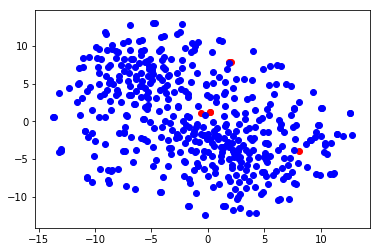

In [116]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=50)
fiftyDimVecs = pca.fit_transform([doc['vec'] for doc in docs])
tsne = TSNE(n_components=2)
twoDimVecs = tsne.fit_transform(fiftyDimVecs)

fig, ax = plt.subplots()
for doc, twoDimVec in zip(docs, twoDimVecs):
    ax.scatter(twoDimVec[0], twoDimVec[1], color=('r' if doc['name'].startswith('sieve') else 'b'))
plt.show()